In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"C:\Users\Manoj\Desktop\DATASETS-FOG/falldeteciton.csv", sep=",")
print(df.head(10))

   ACTIVITY      TIME         SL      EEG  BP   HR  CIRCLUATION
0         3   4722.92    4019.64 -1600.00  13   79          317
1         2   4059.12    2191.03 -1146.08  20   54          165
2         2   4773.56    2787.99 -1263.38  46   67          224
3         4   8271.27    9545.98 -2848.93  26  138          554
4         4   7102.16   14148.80 -2381.15  85  120          809
5         5   7015.24    7336.79 -1699.80  22   95          427
6         3   8620.28   24949.90 -3198.06  35  157         1519
7         3   9238.73   39245.50 -2590.00  15  196         1885
8         0  12276.40   59742.00 -5101.00  56  249         2826
9         4  14165.50  140950.00 -1410.00  82  315         5844


In [6]:
print(df.shape)


(16382, 7)


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 7 columns):
ACTIVITY       16382 non-null int64
TIME           16382 non-null float64
SL             16382 non-null float64
EEG            16382 non-null float64
BP             16382 non-null int64
HR             16382 non-null int64
CIRCLUATION    16382 non-null int64
dtypes: float64(3), int64(4)
memory usage: 896.0 KB


In [8]:
df.iloc[:,1:7].describe()


,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16382.000000,1.638200e+04,1.638200e+04,16382.000000,16382.000000,16382.000000
mean,10936.842478,7.527198e+04,-5.621125e+03,58.251068,211.536992,2894.341472
std,5261.463601,1.275022e+05,1.082209e+05,48.292926,129.949521,3825.927830
min,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,7263.685000,9.941170e+03,-5.630000e+03,25.000000,119.000000,587.000000
50%,9769.355000,3.118920e+04,-3.361275e+03,44.000000,180.000000,1581.000000
75%,13481.650000,8.076145e+04,-2.150000e+03,78.000000,271.000000,3539.000000
max,50895.500000,2.426140e+06,1.410000e+06,533.000000,986.000000,52210.000000


In [9]:
d = df["ACTIVITY"].value_counts().sort_index()
print(d)

0    4608
1     502
2    2502
3    3588
4    3494
5    1688
Name: ACTIVITY, dtype: int64


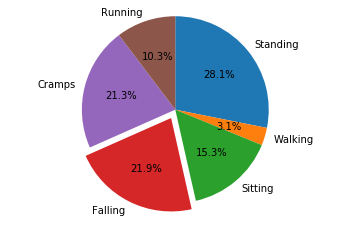

In [10]:
dict = {0:'Standing', 1:'Walking', 2:'Sitting', 3:'Falling', 4:'Cramps', 5:'Running'}
resp = list(dict.keys())
labels = list(dict.values())
sizes = [d[0], d[1], d[2], d[3], d[4], d[5]]
explode = (0, 0, 0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', startangle = 90, counterclock=False, shadow=False)
ax1.axis('equal')
plt.show()

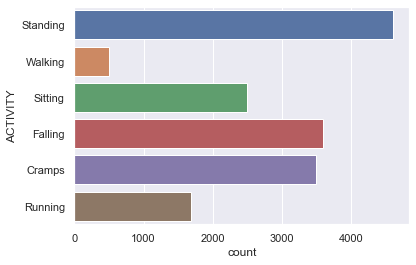

In [11]:
sns.set(style="darkgrid")
ax = sns.countplot(y='ACTIVITY', data=df)
ax.set_yticklabels(labels);

In [12]:
colum_names = ['TIME','SL','EEG','BP','HR','CIRCLUATION']
df_pivot_table = df.pivot_table(colum_names,
               ['ACTIVITY'], aggfunc='median')
print(df_pivot_table)

          BP  CIRCLUATION      EEG     HR        SL       TIME
ACTIVITY                                                      
0         50         2321 -5280.00  224.5  51477.50  11316.500
1         21          343 -1435.00   85.0   4770.05   5725.915
2         42          587 -2200.00  128.0   9759.73   7569.470
3         42         1922 -3110.00  196.0  39215.35  10124.150
4         47         1415 -3069.75  174.0  27563.65   9577.390
5         46         1747 -3254.80  179.0  30372.85   9472.360


                 TIME        SL       EEG        BP        HR  CIRCLUATION
TIME         1.000000  0.843200 -0.048278  0.442334  0.973901     0.876956
SL           0.843200  1.000000 -0.050946  0.401064  0.859408     0.978060
EEG         -0.048278 -0.050946  1.000000 -0.049892 -0.050316    -0.050408
BP           0.442334  0.401064 -0.049892  1.000000  0.469164     0.419356
HR           0.973901  0.859408 -0.050316  0.469164  1.000000     0.904160
CIRCLUATION  0.876956  0.978060 -0.050408  0.419356  0.904160     1.000000


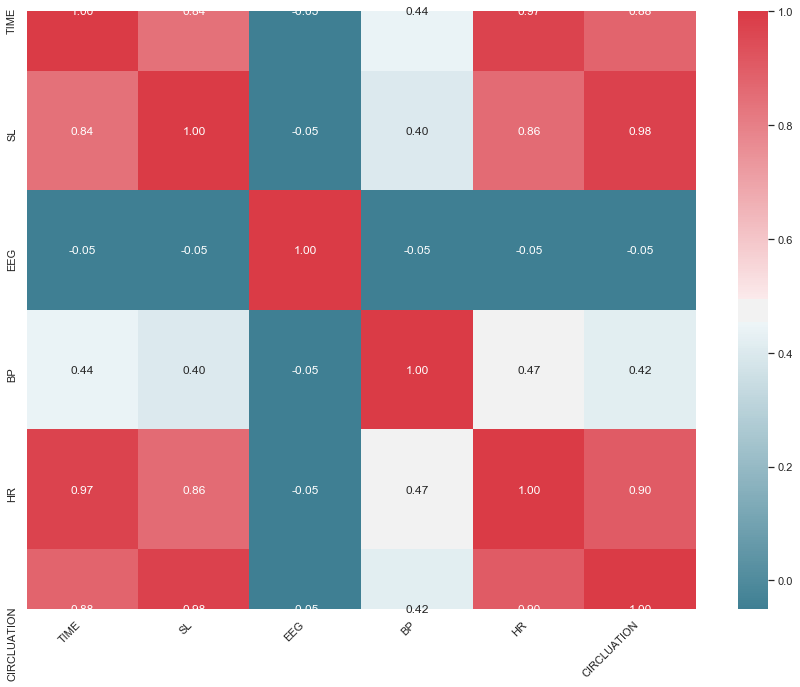

In [13]:
tmp = df.drop('ACTIVITY', axis=1)
correlations = tmp.corr()
print(correlations)
# Plot figsize
fig, ax = plt.subplots(figsize=(15, 11))
# Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(
    colum_names,
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(colum_names);

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape


(14203, 7)

In [17]:
decision = []
for i in df_out['ACTIVITY']:
    if i == 3:
        decision.append('1')
    else: 
        decision.append('0')
df_out['DECISION'] = decision
print(df_out.head(10))

   ACTIVITY      TIME         SL      EEG  BP   HR  CIRCLUATION DECISION
0         3   4722.92    4019.64 -1600.00  13   79          317        1
1         2   4059.12    2191.03 -1146.08  20   54          165        0
2         2   4773.56    2787.99 -1263.38  46   67          224        0
3         4   8271.27    9545.98 -2848.93  26  138          554        0
4         4   7102.16   14148.80 -2381.15  85  120          809        0
5         5   7015.24    7336.79 -1699.80  22   95          427        0
6         3   8620.28   24949.90 -3198.06  35  157         1519        1
7         3   9238.73   39245.50 -2590.00  15  196         1885        1
8         0  12276.40   59742.00 -5101.00  56  249         2826        0
9         4  14165.50  140950.00 -1410.00  82  315         5844        0


In [18]:
df_out['DECISION'].value_counts().sort_index()


0    11051
1     3152
Name: DECISION, dtype: int64

In [19]:
X = df_out.iloc[:,1:7]
y = df_out['DECISION']
print(X.shape)
print(y.shape)

(14203, 6)
(14203,)


In [20]:
print(X.head(10))


       TIME         SL      EEG  BP   HR  CIRCLUATION
0   4722.92    4019.64 -1600.00  13   79          317
1   4059.12    2191.03 -1146.08  20   54          165
2   4773.56    2787.99 -1263.38  46   67          224
3   8271.27    9545.98 -2848.93  26  138          554
4   7102.16   14148.80 -2381.15  85  120          809
5   7015.24    7336.79 -1699.80  22   95          427
6   8620.28   24949.90 -3198.06  35  157         1519
7   9238.73   39245.50 -2590.00  15  196         1885
8  12276.40   59742.00 -5101.00  56  249         2826
9  14165.50  140950.00 -1410.00  82  315         5844


In [21]:
print(y.head(10))


0    1
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
Name: DECISION, dtype: object


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Apply standard scaling to get optimized result
sc = StandardScaler()
#sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9942, 6)
(9942,)
(4261, 6)
(4261,)


In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

# Print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
lr_class_report = classification_report(y_test, lr_predict) 
print(lr_conf_matrix)
print('Accuracy Score :', '%.2f' %lr_acc_score)
print('Classification Report :')
print(lr_class_report)

[[3294   42]
 [ 901   24]]
Accuracy Score : 0.78
Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.99      0.87      3336
           1       0.36      0.03      0.05       925

    accuracy                           0.78      4261
   macro avg       0.57      0.51      0.46      4261
weighted avg       0.69      0.78      0.70      4261



In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

# Print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
dt_class_report = classification_report(y_test, dt_predict) 
print(dt_conf_matrix)
print('Accuracy Score :', '%.2f' %dt_acc_score)
print('Classification Report :')
print(dt_class_report)

[[2910  426]
 [ 608  317]]
Accuracy Score : 0.76
Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3336
           1       0.43      0.34      0.38       925

    accuracy                           0.76      4261
   macro avg       0.63      0.61      0.61      4261
weighted avg       0.74      0.76      0.75      4261



In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

# Print confusion matrix and accuracy score
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
knn_class_report = classification_report(y_test, knn_predict) 
print(knn_conf_matrix)
print('Accuracy Score :', '%.2f' %knn_acc_score)
print('Classification Report :')
print(knn_class_report)

[[2964  372]
 [ 381  544]]
Accuracy Score : 0.82
Classification Report :
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3336
           1       0.59      0.59      0.59       925

    accuracy                           0.82      4261
   macro avg       0.74      0.74      0.74      4261
weighted avg       0.82      0.82      0.82      4261



In [26]:
svc = SVC()
svc.fit(X_train,y_train)
svc_predict = svc.predict(X_test)

# Print confusion matrix and accuracy score
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
svc_acc_score = accuracy_score(y_test, svc_predict)
svc_class_report = classification_report(y_test, svc_predict)
print(svc_conf_matrix)
print('Accuracy Score :','%.2f' %svc_acc_score)
print('Classification Report :')
print(svc_class_report)

[[3318   18]
 [ 898   27]]
Accuracy Score : 0.79
Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3336
           1       0.60      0.03      0.06       925

    accuracy                           0.79      4261
   macro avg       0.69      0.51      0.47      4261
weighted avg       0.75      0.79      0.70      4261



In [28]:
scores = [lr_acc_score,dt_acc_score,knn_acc_score,svc_acc_score]
algorithms = ["Logistic Regression","DecisionTreeClassifier","SVC","KNeighborsClassifier"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 0.7786904482515842 %
The accuracy score achieved using DecisionTreeClassifier is: 0.7573339591645154 %
The accuracy score achieved using SVC is: 0.8232809199718376 %
The accuracy score achieved using KNeighborsClassifier is: 0.7850269889697254 %


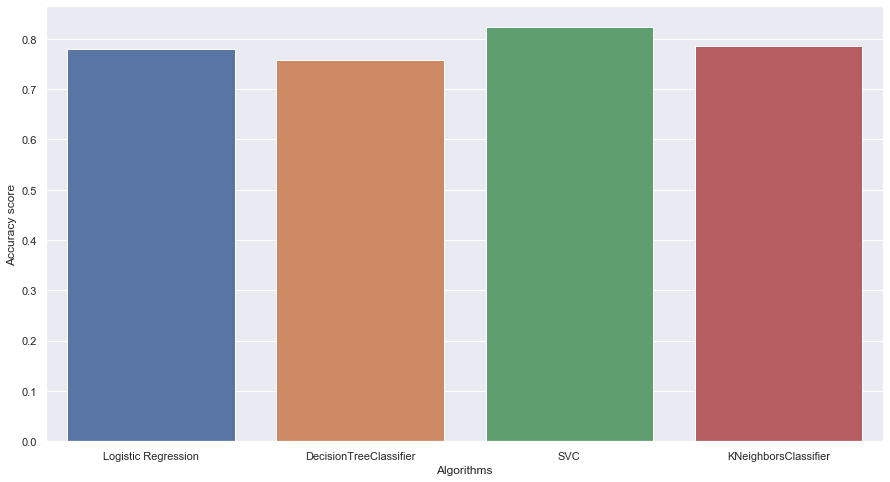

In [30]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)